In [33]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ks_2samp,zscore
import researchpy as rp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import display,clear_output,HTML

In [2]:
def kde_plot(var,data):
    plt.figure(figsize=(10,8))
    sns.distplot(data.loc[data['Target'] == 0, var], label = 'TARGET == 0')
    sns.distplot(data.loc[data['Target'] == 1, var], label = 'TARGET == 1')
    plt.xlabel(var)
    plt.ylabel('Histogram')
    plt.title('%s Histogram  ' % var)
    plt.legend()
    plt.show()

In [3]:
df_train=pd.read_csv('../Data/Training_Data/df_training.csv',index_col='domain')

In [4]:
df_train.shape

(39183, 35)

### 1. With Features we Identified

#### 1.A TSNE
##### 1.A.a Visualization of Data using TSNE on random sample of training set(Alexa top 35k + Talso 5k) 

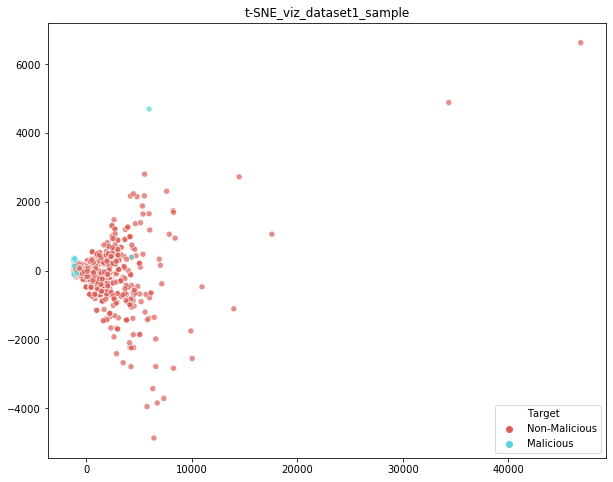

CPU times: user 6min 11s, sys: 824 ms, total: 6min 12s
Wall time: 25.5 s


In [5]:
%%time
data=df_train.sample(n=5000,random_state=0)
data_X=data.iloc[:,df_train.columns!='Target']
data_Y=data.Target.apply(lambda x: 'Malicious' if x==1 else 'Non-Malicious' )
Y = TSNE(n_components=2, init='pca',n_iter=1500,random_state=0).fit_transform(data_X)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# ax.scatter(Y[:, 0], Y[:, 1], alpha=0.2,c=data_Y)
sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('t-SNE_viz_dataset1_sample')
fig.savefig('t-SNE_viz_dataset1_sample.jpeg')
plt.show()  

##### 1.A.b Visualization of Data using TSNE on entire training set(Alexa top 35k + Talso 5k) 

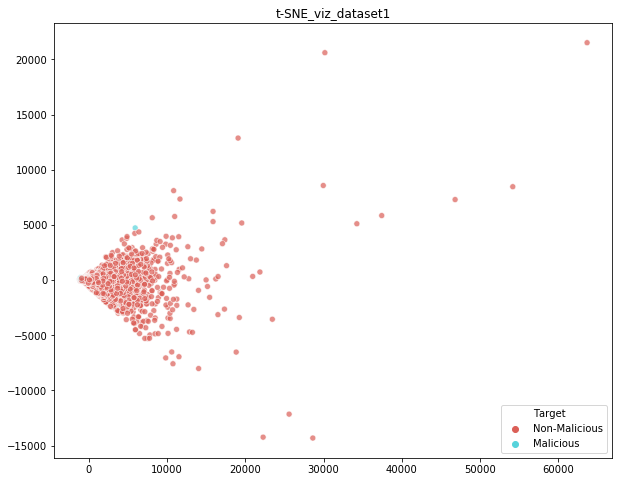

CPU times: user 46min 40s, sys: 4.29 s, total: 46min 45s
Wall time: 4min 26s


In [6]:
%%time
data=df_train.sample(frac=1,random_state=0)
data_X=data.iloc[:,df_train.columns!='Target']
data_Y=data.Target.apply(lambda x: 'Malicious' if x==1 else 'Non-Malicious' )
Y = TSNE(n_components=2, init='pca',n_iter=1500,random_state=0).fit_transform(data_X)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# ax.scatter(Y[:, 0], Y[:, 1], alpha=0.2,c=data_Y)
sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('t-SNE_viz_dataset1')
fig.savefig('t-SNE_viz_dataset1.jpeg')
plt.show()  

#### 1.B PCA
##### 1.B.a Visualization of Data Using PCA on entire training set (Alexa top 35k + Talso 5k)  

Explained variation per principal component: 0.9678454375480563


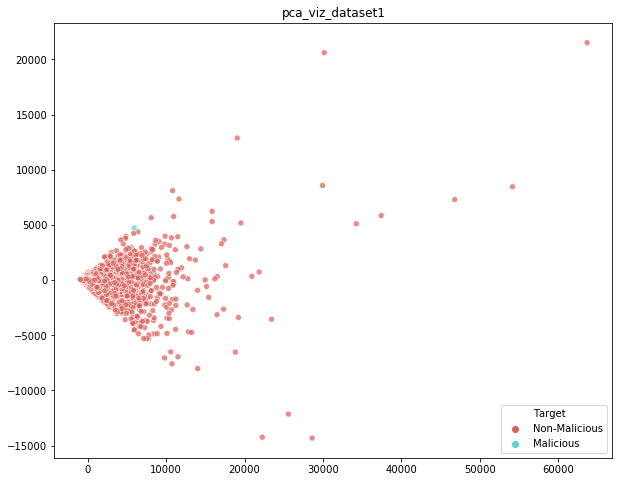

In [8]:
data=df_train.sample(frac=1,random_state=100)
data_X=data.iloc[:,df_train.columns!='Target'].values
data_Y=data.Target.apply(lambda x: 'Malicious' if x==1 else 'Non-Malicious' )
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_X)
print('Explained variation per principal component: {}'.format(sum(pca.explained_variance_ratio_)))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# ax.scatter(Y[:, 0], Y[:, 1], alpha=0.2,c=data_Y)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('pca_viz_dataset1')
fig.savefig('pca_viz_dataset1.jpeg')
plt.show()  

##### 1.B.b Scaled Data

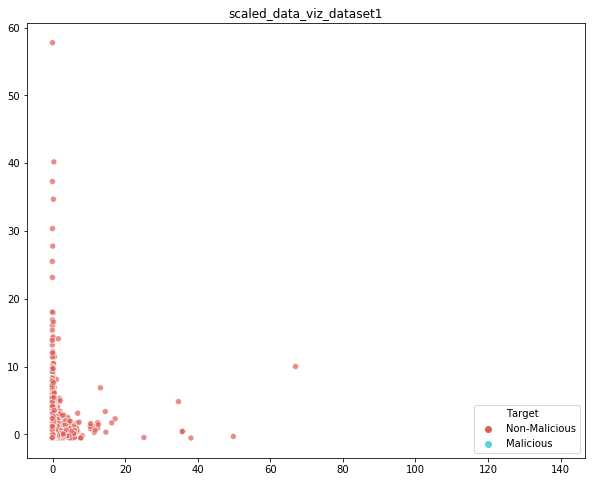

In [9]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(data_X)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.scatterplot(x=scaled_X[:,0], y=scaled_X[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('scaled_data_viz_dataset1')
fig.savefig('scaled_data_viz_dataset1.jpeg')
plt.show()  

##### 1.B.c After removing outliers (>4std)

In [10]:
df_out=df_train[(np.abs(zscore(df_train)) < 5).all(axis=1)]
df_out.Target.value_counts()

0    33006
1     3660
Name: Target, dtype: int64

Explained variation per principal component: 0.9745452853237533


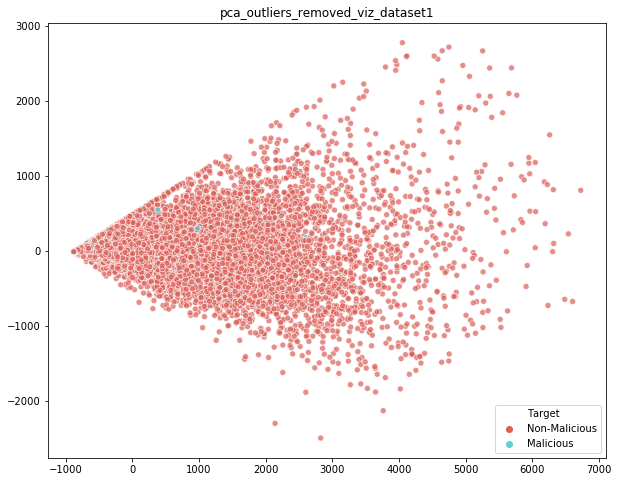

In [11]:
data=df_out.sample(frac=1,random_state=100)
data_X=data.iloc[:,df_train.columns!='Target'].values
data_Y=data.Target.apply(lambda x: 'Malicious' if x==1 else 'Non-Malicious' )
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_X)
print('Explained variation per principal component: {}'.format(sum(pca.explained_variance_ratio_)))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('pca_outliers_removed_viz_dataset1')
fig.savefig('pca_outliers_removed_viz_dataset1.jpeg')
plt.show()  

##### 1.B.d Scaled Data

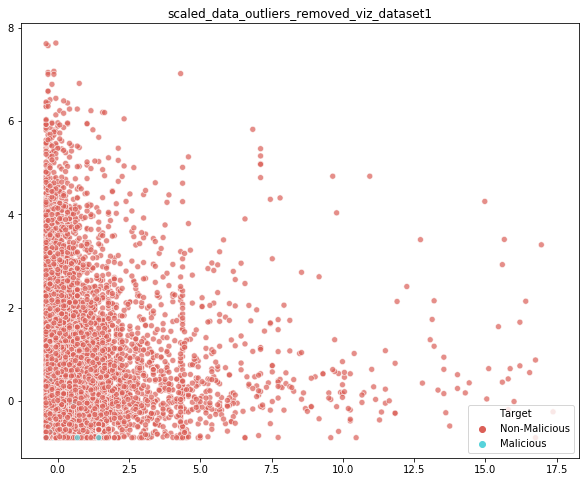

In [12]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(data_X)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.scatterplot(x=scaled_X[:,0], y=scaled_X[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('scaled_data_outliers_removed_viz_dataset1')
fig.savefig('scaled_data_outliers_removed_viz_dataset1.jpeg')
plt.show()  

#### 1.C Correlation

In [97]:
lst=[]
for col in df_train.columns:
    lst.append((col,df_train[col].corr(df_train.Target)))
df_train_corr=pd.DataFrame(lst,columns=['domain','Correlation_Magnitude'])
df_train_corr.Correlation_Magnitude=df_train_corr.Correlation_Magnitude.apply(lambda x: np.absolute(x))
print("Correlation for entire Training Set")
df_train_corr.sort_values(by='Correlation_Magnitude',ascending=False)

Correlation for entire Training Set


,domain,Correlation_Magnitude
34,Target,1.000000
33,url_length,0.524600
23,url_char_.,0.507856
32,url_extensions,0.467273
18,http_header_content-encoding_gzip,0.435051
28,url_char_w,0.382180
30,url_char_z,0.312917
29,url_char_y,0.285445
20,http_header_transfer-encoding_chunked,0.279753
25,url_char_i,0.256620


### 2. With Previous Features

#### 2.A TSNE
##### 2.A.a Visualization of Data using TSNE on random sample of training set(Alexa top 35k + Talso 5k) 

In [13]:
df_train_prev=pd.read_csv('../Data/Training_Data/df_training_prev.csv',index_col='domain')

In [14]:
df_train_prev.shape

(39183, 100)

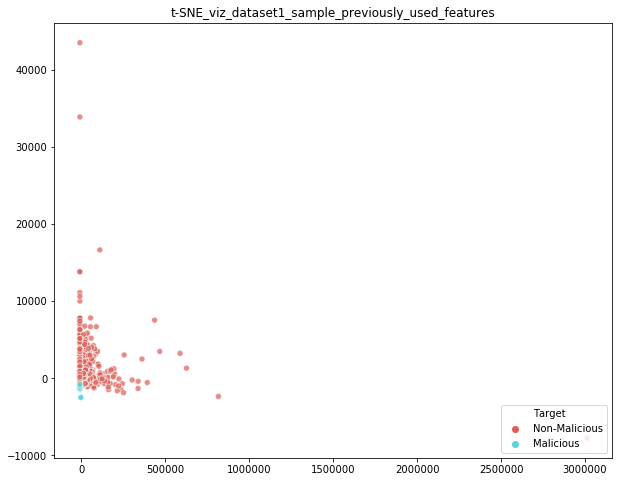

CPU times: user 18min 24s, sys: 716 ms, total: 18min 25s
Wall time: 56.2 s


In [15]:
%%time
data=df_train_prev.sample(n=5000,random_state=0)
data_X=data.iloc[:,data.columns!='Target']
data_Y=data.Target.apply(lambda x: 'Malicious' if x==1 else 'Non-Malicious' )
Y = TSNE(n_components=2, init='pca',n_iter=1500,random_state=0).fit_transform(data_X)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# ax.scatter(Y[:, 0], Y[:, 1], alpha=0.2,c=data_Y)
sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('t-SNE_viz_dataset1_sample_previously_used_features')
fig.savefig('t-SNE_viz_dataset1_sample_previously_used_features.jpeg')
plt.show()  

#### 2.B PCA
##### 2.B.a Visualization of Data Using PCA on entire training set (Alexa top 35k + Talso 5k)  

Explained variation per principal component: 0.9997376664584859


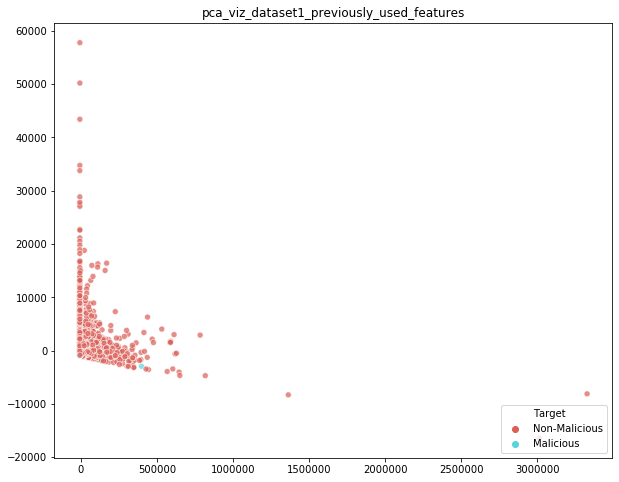

In [16]:
data=df_train_prev.sample(frac=1,random_state=100)
data_X=data.iloc[:,data.columns!='Target'].values
data_Y=data.Target.apply(lambda x: 'Malicious' if x==1 else 'Non-Malicious' )
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_X)
print('Explained variation per principal component: {}'.format(sum(pca.explained_variance_ratio_)))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# ax.scatter(Y[:, 0], Y[:, 1], alpha=0.2,c=data_Y)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('pca_viz_dataset1_previously_used_features')
fig.savefig('pca_viz_dataset1_previously_used_features.jpeg')
plt.show()  

##### 2.B.b Scaled Data

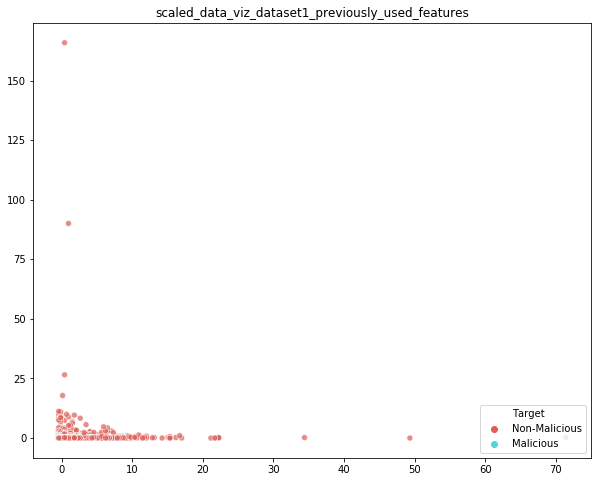

In [17]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(data_X)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.scatterplot(x=scaled_X[:,0], y=scaled_X[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('scaled_data_viz_dataset1_previously_used_features')
fig.savefig('scaled_data_viz_dataset1_previously_used_features.jpeg')
plt.show()  

##### 2.B.c After removing outliers (>4std)

In [18]:
df_out=df_train_prev[(np.abs(zscore(df_train_prev)) < 5).all(axis=1)]
df_out.Target.value_counts()

0    29326
1     3213
Name: Target, dtype: int64

Explained variation per principal component: 0.9539396940404041


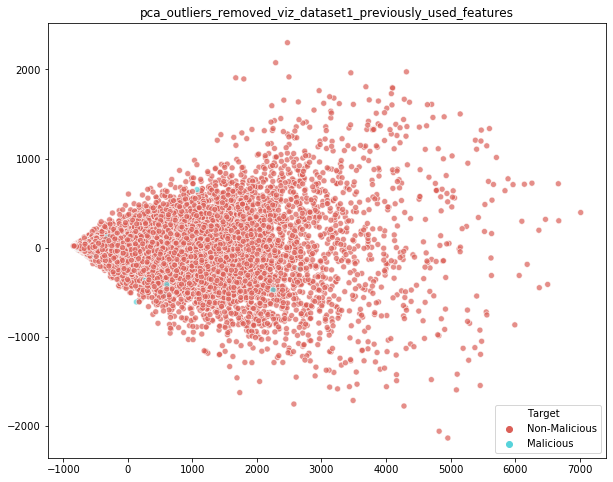

In [19]:
data=df_out.sample(frac=1,random_state=100)
data_X=data.iloc[:,df_train.columns!='Target'].values
data_Y=data.Target.apply(lambda x: 'Malicious' if x==1 else 'Non-Malicious' )
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_X)
print('Explained variation per principal component: {}'.format(sum(pca.explained_variance_ratio_)))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('pca_outliers_removed_viz_dataset1_previously_used_features')
fig.savefig('pca_outliers_removed_viz_dataset1_previously_used_features.jpeg')
plt.show()  

##### 2.B.d Scaled Data

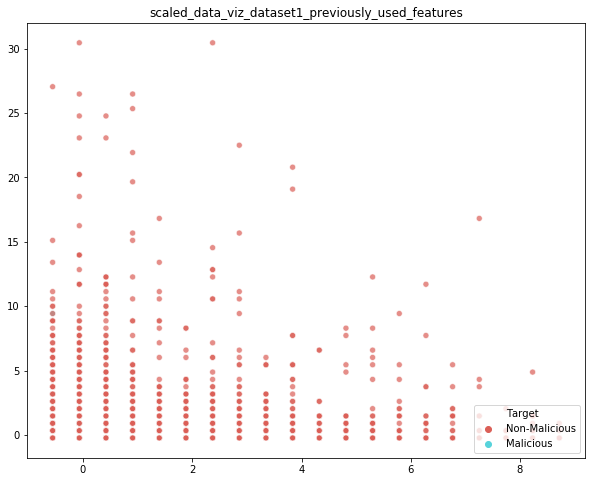

In [21]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(data_X)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.scatterplot(x=scaled_X[:,0], y=scaled_X[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('scaled_data_viz_dataset1_previously_used_features')
fig.savefig('scaled_data_viz_dataset1_previously_used_features.jpeg')
plt.show()  

#### 2.C Correlation

In [8]:
lst=[]
for col in df_train_prev.columns:
    lst.append((col,df_train_prev[col].corr(df_train_prev.Target)))
df_train_corr=pd.DataFrame(lst,columns=['domain','Correlation_Magnitude'])
df_train_corr.Correlation_Magnitude=df_train_corr.Correlation_Magnitude.apply(lambda x: np.absolute(x))
print("Correlation for entire Training Set")
df_train_corr.sort_values(by='Correlation_Magnitude',ascending=False)
# df_train_corr.to_csv('df_train_prev_corr.csv')

Correlation for entire Training Set


### 3. With 290 Features

#### 3.A TSNE
##### 3.A.a Visualization of Data using TSNE on random sample of training set(Alexa top 35k + Talso 5k) 

In [22]:
df_train_292=pd.read_csv('../Data/Training_Data/df_training_292.csv',index_col='domain',low_memory=False)
df_train_292.replace('True',1,inplace=True)
df_train_292.replace('False',0,inplace=True)
df_train_292.drop(['Unnamed: 0','total_count.1','total_href.1'],axis=1,inplace=True)
for col in df_train_292.columns:
    df_train_292[col]=df_train_292[col].astype(int)

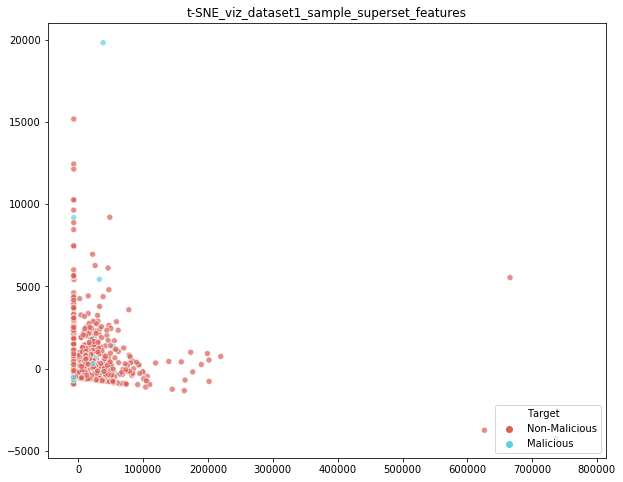

CPU times: user 13min 13s, sys: 704 ms, total: 13min 14s
Wall time: 43.8 s


In [24]:
%%time
data=df_train_292.sample(n=5000,random_state=0)
data_X=data.iloc[:,df_train_292.columns!='Target']
data_Y=data.Target.apply(lambda x: 'Malicious' if x==1 else 'Non-Malicious' )
Y = TSNE(n_components=2, init='pca',n_iter=1500,random_state=0).fit_transform(data_X)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# ax.scatter(Y[:, 0], Y[:, 1], alpha=0.2,c=data_Y)
sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('t-SNE_viz_dataset1_sample_superset_features')
fig.savefig('t-SNE_viz_dataset1_sample_superset_features.jpeg')
plt.show()  

#### 3.B PCA
##### 3.B.a Visualization of Data Using PCA on entire training set (Alexa top 35k + Talso 5k)  

Explained variation per principal component: 0.9996710114585369


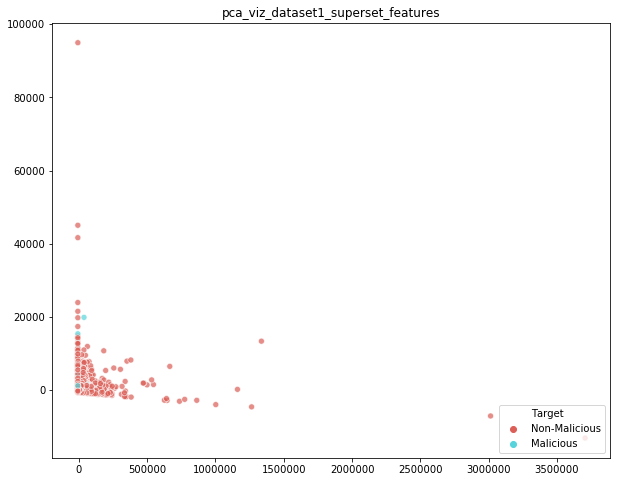

In [26]:
data=df_train_292.sample(frac=1,random_state=100)
data_X=data.iloc[:,data.columns!='Target'].values
data_Y=data.Target.apply(lambda x: 'Malicious' if x==1 else 'Non-Malicious' )
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_X)
print('Explained variation per principal component: {}'.format(sum(pca.explained_variance_ratio_)))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# ax.scatter(Y[:, 0], Y[:, 1], alpha=0.2,c=data_Y)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('pca_viz_dataset1_superset_features')
fig.savefig('pca_viz_dataset1_superset_features.jpeg')
plt.show()  

##### 3.B.b Scaled Data

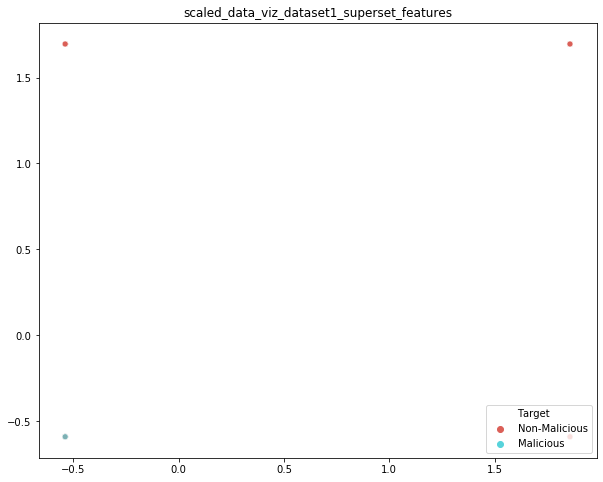

In [28]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(data_X)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.scatterplot(x=scaled_X[:,0], y=scaled_X[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('scaled_data_viz_dataset1_superset_features')
fig.savefig('scaled_data_viz_dataset1_superset_features.jpeg')
plt.show()  

##### 3.B.c After removing outliers (>4std)

In [30]:
df_out=df_train_292[(np.abs(zscore(df_train_292)) < 5).all(axis=1)]
df_out.Target.value_counts()

0    25258
1     1242
Name: Target, dtype: int64

Explained variation per principal component: 0.9999946549378524


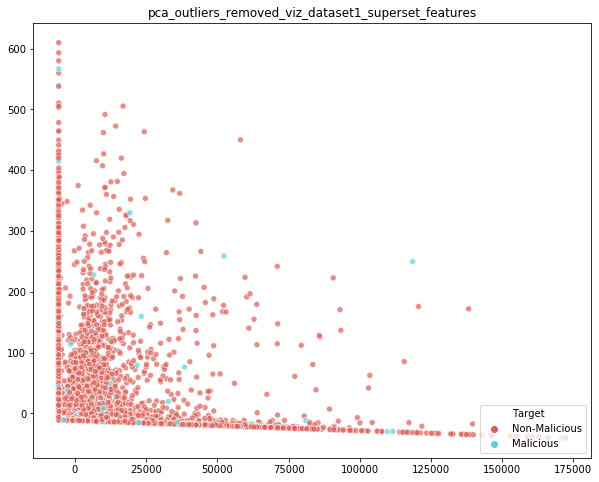

In [31]:
data=df_out.sample(frac=1,random_state=100)
data_X=data.iloc[:,df_train.columns!='Target'].values
data_Y=data.Target.apply(lambda x: 'Malicious' if x==1 else 'Non-Malicious' )
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_X)
print('Explained variation per principal component: {}'.format(sum(pca.explained_variance_ratio_)))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=data_Y, palette="hls",alpha=0.7)
plt.axis('tight')
plt.legend(loc='lower right')
plt.title('pca_outliers_removed_viz_dataset1_superset_features')
fig.savefig('pca_outliers_removed_viz_dataset1_superset_features.jpeg')
plt.show()  

##### 3.B.d Scaled Data

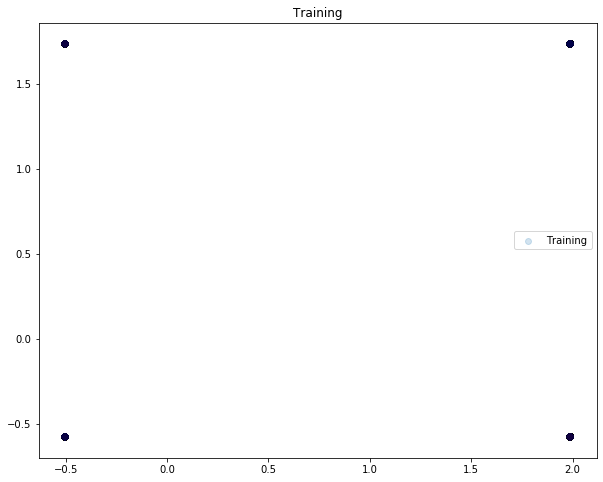

In [29]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(data_X)
_, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(scaled_X[:, 0], scaled_X[:, 1], label='Training', alpha=0.2,c=data_Y,cmap='seismic')
ax.set_title('Training')
ax.legend()
plt.axis('tight')
plt.show()  

#### 3.C Correlation

In [30]:
lst=[]
for col in df_train_292.columns:
    lst.append((col,df_train_292[col].corr(df_train_292.Target)))
df_train_corr=pd.DataFrame(lst,columns=['domain','Correlation_Magnitude'])
df_train_corr.Correlation_Magnitude=df_train_corr.Correlation_Magnitude.apply(lambda x: np.absolute(x))
print("Correlation for entire Training Set")
df_train_corr.sort_values(by='Correlation_Magnitude',ascending=False)

Correlation for entire Training Set


,domain,Correlation_Magnitude
287,Target,1.000000
241,url_char_-,0.343645
13,http_header_marco_contenttext,0.060405
9,http_header_content-language_text/html,0.058591
275,url_length,0.052114
167,link_href_https,0.044946
174,link_rel_canonical,0.040599
168,link_href_out_of_domain,0.040410
221,script_src_relative,0.040188
217,script_src_absolute,0.040188


In [34]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')